In [1]:
#This notebook demonstrates the accuracy of in-built classifiers from scikit learn's library with regards to
#(a) Various synthetic dataset - usign scikit learns make_blobs, make_moons, make_circles
#(b) Performance on the generated data with the addition of noise dimensions 

In [2]:
#The classifiers that will be tested are
# 1.Random forest
# 2.SVM
# 3.KNN

In [3]:
#Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles,make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

In [51]:
#set up the datasets

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]          

In [52]:
X.shape

(100, 2)

In [53]:
names = ["SVM", "Random Forest", "KNN" ]
classifiers = [
    KNeighborsClassifier(3),
    svm.SVC(kernel="linear", C=0.025),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)]

In [54]:
#Store the input data and the associated labels to a variable
(X1,y1) = datasets[0]
(X2,y2) = datasets[1]
(X3,y3) = datasets[2]
print("Dimensions of the original data is", X1.shape)

Dimensions of the original data is (100, 2)


In [26]:
from sklearn import preprocessing

In [27]:
scaler = preprocessing.StandardScaler()


In [55]:
#Normalise each input dataset
X1_scaled=scaler.fit_transform(X1)
X2_scaled=scaler.fit_transform(X2)
X3_scaled=scaler.fit_transform(X3)
#print("The valriance all", np.var(X1_scaled),np.var(X2_scaled),np.var(X3_scaled))

In [56]:
#Function to calculate the accuracy
def fit_predict(train_data, test_data, train_label , test_label):
    accuracies = []
    for name, model in zip(names, classifiers):
        model.fit(train_data, train_label)
        score = model.score(test_data, test_label)
        accuracies.append(score)
    
    SVM_acc = accuracies[0]
    RF_acc = accuracies[1]
    KNN_acc = accuracies[2]
#     print("Accuracy for SVM", accuracies[0])
#     print("Accuracy for RF", accuracies[1])
#     print("Accuracy for KNN", accuracies[2])
    return SVM_acc,RF_acc,KNN_acc

In [58]:
#Define various levels of noise dimensions
#noise dimensions to try n = 4,6,10,20,100,500,1000,1500
n_dim = X1.shape[0]
#print(n_dim)
m_dim = [0,2, 4, 6, 20, 200, 400, 1200]
#m_dim = [0,2, 4, 6, 20]
#initially, each new set of gaussion noise contained a different sigma value.
#Now, create the dimensions with a set sigma value and then change it over iterations
mu = 0
gauss_noise1 = []
gauss_noise2 = []
gauss_noise3 = []

sigma = np.sqrt([0.1, 1, 10])
# print(sigma)

for i in range(len(m_dim)):
        gauss_noise1.append(np.random.normal(mu, sigma[0], size = [n_dim, m_dim[i]]))
        gauss_noise2.append(np.random.normal(mu, sigma[1], size = [n_dim, m_dim[i]]))
        gauss_noise3.append(np.random.normal(mu, sigma[2], size = [n_dim, m_dim[i]]))
# print(len(gauss_noise1))

In [60]:
#Check if the noise has the right shape to be concatenated
for b in range(len(m_dim)):
        print(gauss_noise1[b].shape)
        

(100, 0)
(100, 2)
(100, 4)
(100, 6)
(100, 20)
(100, 200)
(100, 400)
(100, 1200)


In [62]:
#concatenate all the noise dimensions to the original data
X1_noise_dims1 = [] #list to store input data1 concatenated with the 1st gaussian noise with vairance = 0.1
X1_noise_dims2 = [] #list to store input data1 concatenated with the 2nd gaussian noise with vairance = 1
X1_noise_dims3 = [] #list to store input data1 concatenated with the 3rd gaussian noise with vairance = 10

X2_noise_dims1 = [] #list to store input data2 concatenated with the 1st gaussian noise with vairance = 0.1
X2_noise_dims2 = [] #list to store input data2 concatenated with the 2nd gaussian noise with vairance = 1
X2_noise_dims3 = []

X3_noise_dims1 = []
X3_noise_dims2 = []
X3_noise_dims3 = []

for g in range(len(m_dim)):
    X1_noise_dims1.append(np.concatenate([X1_scaled, gauss_noise1[g]], axis = 1)) #This contains the input data concatenated with var = 0.1 noise
    X1_noise_dims2.append(np.concatenate([X1_scaled, gauss_noise2[g]], axis = 1)) #This contains the input data concatenated with var = 1 noise
    X1_noise_dims3.append(np.concatenate([X1_scaled, gauss_noise3[g]], axis = 1)) #This contains the input data concatenated with var = 10 noise
    
    X2_noise_dims1.append(np.concatenate([X2_scaled, gauss_noise1[g]], axis = 1))
    X2_noise_dims2.append(np.concatenate([X3_scaled, gauss_noise2[g]], axis = 1))
    X2_noise_dims3.append(np.concatenate([X3_scaled, gauss_noise3[g]], axis = 1))
    
    X3_noise_dims1.append(np.concatenate([X3_scaled, gauss_noise1[g]], axis = 1))
    X3_noise_dims2.append(np.concatenate([X3_scaled, gauss_noise2[g]], axis = 1))
    X3_noise_dims3.append(np.concatenate([X3_scaled, gauss_noise3[g]], axis = 1))
    
                         

In [63]:
#Each time the input data is concatenated with the corresponding noise and then stored seperately before the training and testing
for j in range(len(m_dim)):
    print(X1_noise_dims1[j].shape)

(100, 2)
(100, 4)
(100, 6)
(100, 8)
(100, 22)
(100, 202)
(100, 402)
(100, 1202)


In [64]:
#list to store the train, test data and labels for the first dataset in correspondance to the 3 different variance value gaussian noise
X1_train_noise1 = [] 
X1_train_noise2 = []
X1_train_noise3 = [] 
X1_test_noise1 = [] 
X1_test_noise2 = [] 
X1_test_noise3 = [] 
y1_train_noise1 = []
y1_train_noise2 = []
y1_train_noise3 = []
y1_test_noise1 = []
y1_test_noise2 = []
y1_test_noise3 = []

#list to store the train, test data and labels for the 2nd dataset in correspondance to the 3 different variance value noise
X2_train_noise1 = []
X2_train_noise2 = []
X2_train_noise3 = [] 
X2_test_noise1 = []
X2_test_noise2 = [] 
X2_test_noise3 = []  
y2_train_noise1 = []
y2_train_noise2 = []
y2_train_noise3 = []
y2_test_noise1 = []
y2_test_noise2 = []
y2_test_noise3 = []

#list to store the train, test data and labels for the 3rd dataset in correspondance to the 3 different variance value noise
X3_train_noise1 = []
X3_train_noise2 = []
X3_train_noise3 = [] 
X3_test_noise1 = []
X3_test_noise2 = []
X3_test_noise3 = [] 
y3_train_noise1 = []
y3_train_noise2 = []
y3_train_noise3 = []
y3_test_noise1 = []
y3_test_noise2 = []
y3_test_noise3 = []

for z in range(len(X1_noise_dims1)):
    print(z)
    X_tr1_n1, X_te1_n1, y_tr1_n1, y_te1_n1 = train_test_split(X1_noise_dims1[z], y1, test_size=0.4, random_state=42)
    X_tr1_n2, X_te1_n2, y_tr1_n2, y_te1_n2 = train_test_split(X1_noise_dims2[z], y1, test_size=0.4, random_state=42)
    X_tr1_n3, X_te1_n3, y_tr1_n3, y_te1_n3 = train_test_split(X1_noise_dims3[z], y1, test_size=0.4, random_state=42)
    
    X_tr2_n1, X_te2_n1, y_tr2_n1, y_te2_n1 = train_test_split(X2_noise_dims1[z], y2, test_size=0.4, random_state=42)
    X_tr2_n2, X_te2_n2, y_tr2_n2, y_te2_n2 = train_test_split(X2_noise_dims2[z], y2, test_size=0.4, random_state=42)
    X_tr2_n3, X_te2_n3, y_tr2_n3, y_te2_n3 = train_test_split(X2_noise_dims3[z], y2, test_size=0.4, random_state=42)
    
    X_tr3_n1, X_te3_n1, y_tr3_n1, y_te3_n1 = train_test_split(X3_noise_dims1[z], y3, test_size=0.4, random_state=42)
    X_tr3_n2, X_te3_n2, y_tr3_n2, y_te3_n2 = train_test_split(X3_noise_dims2[z], y3, test_size=0.4, random_state=42)
    X_tr3_n3, X_te3_n3, y_tr3_n3, y_te3_n3 = train_test_split(X3_noise_dims3[z], y3, test_size=0.4, random_state=42)
    
    X1_train_noise1.append(X_tr1_n1)
    X1_test_noise1.append(X_te1_n1)
    y1_train_noise1.append(y_tr1_n1)
    y1_test_noise1.append(y_te1_n1)
    
    X1_train_noise2.append(X_tr1_n2)
    X1_test_noise2.append(X_te1_n2)
    y1_train_noise2.append(y_tr1_n2)
    y1_test_noise2.append(y_te1_n2)
    
    X1_train_noise3.append(X_tr1_n3)
    X1_test_noise3.append(X_te1_n3)
    y1_train_noise3.append(y_tr1_n3)
    y1_test_noise3.append(y_te1_n3)
    
    X2_train_noise1.append(X_tr2_n1)
    X2_test_noise1.append(X_te2_n1)
    y2_train_noise1.append(y_tr2_n1)
    y2_test_noise1.append(y_te2_n1)
    
    X2_train_noise2.append(X_tr2_n2)
    X2_test_noise2.append(X_te2_n2)
    y2_train_noise2.append(y_tr2_n2)
    y2_test_noise2.append(y_te2_n2)
    
    X2_train_noise3.append(X_tr2_n3)
    X2_test_noise3.append(X_te2_n3)
    y2_train_noise3.append(y_tr2_n3)
    y2_test_noise3.append(y_te2_n3)
    
    X3_train_noise1.append(X_tr3_n1)
    X3_test_noise1.append(X_te3_n1)
    y3_train_noise1.append(y_tr3_n1)
    y3_test_noise1.append(y_te3_n1)
    
    X3_train_noise2.append(X_tr3_n2)
    X3_test_noise2.append(X_te3_n2)
    y3_train_noise2.append(y_tr3_n2)
    y3_test_noise2.append(y_te3_n2)
    
    X3_train_noise3.append(X_tr3_n3)
    X3_test_noise3.append(X_te3_n3)
    y3_train_noise3.append(y_tr3_n3)
    y3_test_noise3.append(y_te3_n3)

0
1
2
3
4
5
6
7


In [65]:
accuracy1_SVM1 = [] #i/p data 1 with var1 noise SVM accuracy
accuracy1_RF1 = [] #i/p data 1 with var1 noise RF accuracy
accuracy1_KNN1 = [] #i/p data 1 with var1 noise KNN accuracy

accuracy1_SVM2 = [] #i/p data 1 with var2 noise SVM accuracy
accuracy1_RF2 = [] #i/p data 1 with var2 noise RF accuracy
accuracy1_KNN2 = [] #i/p data 1 with var2 noise KNN accuracy

accuracy1_SVM3 = []
accuracy1_RF3 = []
accuracy1_KNN3 = []

accuracy2_SVM1 = [] #i/p data 2 with var1 noise SVM accuracy
accuracy2_RF1 = [] #i/p data 2 with var1 noise RF accuracy
accuracy2_KNN1 = [] #i/p data 2 with var1 noise KNN accuracy

accuracy2_SVM2 = []
accuracy2_RF2 = []
accuracy2_KNN2 = []

accuracy2_SVM3 = []
accuracy2_RF3 = []
accuracy2_KNN3 = []

accuracy3_SVM1 = [] #i/p data 3 with var1 noise SVM accuracy
accuracy3_RF1 = [] #i/p data 3 with var1 noise RF accuracy
accuracy3_KNN1 = [] #i/p data 3 with var1 noise KNN accuracy

accuracy3_SVM2 = []
accuracy3_RF2 = []
accuracy3_KNN2 = []

accuracy3_SVM3 = []
accuracy3_RF3 = []
accuracy3_KNN3 = []



for d in range(len(X1_train_noise1)):
    svm1_var1,rf1_var1,knn1_var1 =fit_predict(X1_train_noise1[d], X1_test_noise1[d], y1_train_noise1[d], y1_test_noise1[d])
    svm1_var2,rf1_var2,knn1_var2 =fit_predict(X1_train_noise2[d], X1_test_noise2[d], y1_train_noise2[d], y1_test_noise2[d])
    svm1_var3,rf1_var3,knn1_var3 =fit_predict(X1_train_noise3[d], X1_test_noise3[d], y1_train_noise3[d], y1_test_noise3[d])
    
    svm2_var1,rf2_var1,knn2_var1 =fit_predict(X2_train_noise1[d], X2_test_noise1[d], y2_train_noise1[d], y2_test_noise1[d])
    svm2_var2,rf2_var2,knn2_var2 =fit_predict(X2_train_noise2[d], X2_test_noise2[d], y2_train_noise2[d], y2_test_noise2[d])
    svm2_var3,rf2_var3,knn2_var3 =fit_predict(X2_train_noise3[d], X2_test_noise3[d], y2_train_noise3[d], y2_test_noise3[d])
    
    svm3_var1,rf3_var1,knn3_var1 =fit_predict(X3_train_noise1[d], X3_test_noise1[d], y3_train_noise1[d], y3_test_noise1[d])
    svm3_var2,rf3_var2,knn3_var2 =fit_predict(X3_train_noise2[d], X3_test_noise2[d], y3_train_noise2[d], y3_test_noise2[d])
    svm3_var3,rf3_var3,knn3_var3 =fit_predict(X3_train_noise3[d], X3_test_noise3[d], y3_train_noise3[d], y3_test_noise3[d])
    
    accuracy1_SVM1.append(svm1_var1)
    accuracy1_RF1.append(rf1_var1)
    accuracy1_KNN1.append(knn1_var1)
    
    accuracy1_SVM2.append(svm1_var2)
    accuracy1_RF2.append(rf1_var2)
    accuracy1_KNN2.append(knn1_var2)
    
    accuracy1_SVM3.append(svm1_var3)
    accuracy1_RF3.append(rf1_var3)
    accuracy1_KNN3.append(knn1_var3)
    
    accuracy2_SVM1.append(svm2_var1)
    accuracy2_RF1.append(rf2_var1)
    accuracy2_KNN1.append(knn2_var1)
    
    accuracy2_SVM2.append(svm2_var2)
    accuracy2_RF2.append(rf2_var2)
    accuracy2_KNN2.append(knn2_var2)
    
    accuracy2_SVM3.append(svm2_var3)
    accuracy2_RF3.append(rf2_var3)
    accuracy2_KNN3.append(knn2_var3)
    
    
    accuracy3_SVM1.append(svm3_var1)
    accuracy3_RF1.append(rf3_var1)
    accuracy3_KNN1.append(knn3_var1)
    
    accuracy3_SVM2.append(svm3_var2)
    accuracy3_RF2.append(rf3_var2)
    accuracy3_KNN2.append(knn3_var2)
    
    accuracy3_SVM3.append(svm3_var3)
    accuracy3_RF3.append(rf3_var3)
    accuracy3_KNN3.append(knn3_var3)

In [66]:
accuracy1_RF2

[0.875, 0.875, 0.85, 0.825, 0.8, 0.525, 0.675, 0.525]

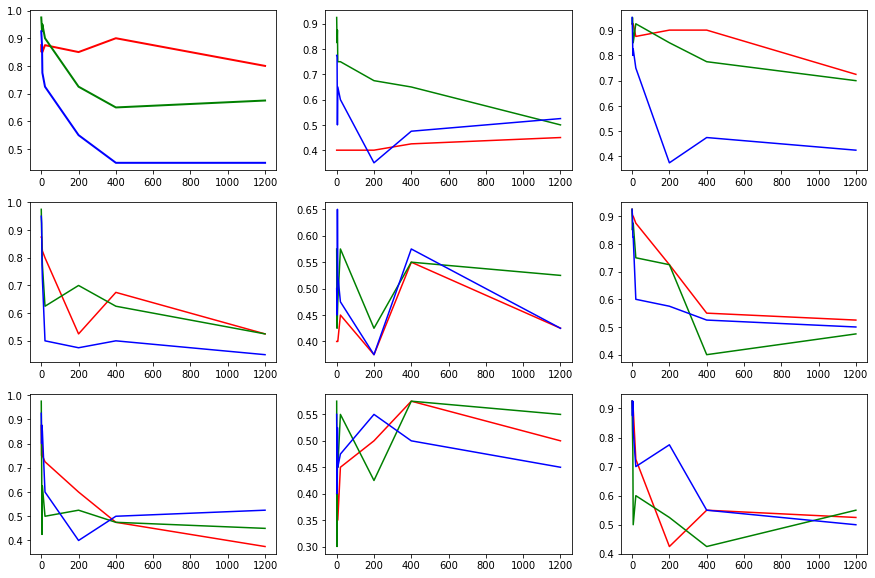

In [68]:
noise_dim = [0,2, 4, 6, 20, 200, 400, 1200]
#noise_dim = [0,2, 4, 6, 20]
plt.figure(figsize = (15,10))
df1=pd.DataFrame({'dimensions': noise_dim, 'RF1_var1': accuracy1_RF1, 'SVM1_var1': accuracy1_SVM1, 'KNN1_var1': accuracy1_KNN1 })
df2=pd.DataFrame({'dimensions': noise_dim, 'RF1_var2': accuracy1_RF2, 'SVM1_var2': accuracy1_SVM2, 'KNN1_var2': accuracy1_KNN2 })
df3=pd.DataFrame({'dimensions': noise_dim, 'RF1_var3': accuracy1_RF3, 'SVM1_var3': accuracy1_SVM3, 'KNN1_var3': accuracy1_KNN3 })
df4=pd.DataFrame({'dimensions': noise_dim, 'RF2_var1': accuracy2_RF1, 'SVM2_var1': accuracy2_SVM1, 'KNN2_var1': accuracy2_KNN1 })
df5=pd.DataFrame({'dimensions': noise_dim, 'RF2_var2': accuracy2_RF2, 'SVM2_var2': accuracy2_SVM2, 'KNN2_var2': accuracy2_KNN2 })
df6=pd.DataFrame({'dimensions': noise_dim, 'RF2_var3': accuracy2_RF3, 'SVM2_var3': accuracy2_SVM3, 'KNN2_var3': accuracy2_KNN3 })
df7=pd.DataFrame({'dimensions': noise_dim, 'RF3_var1': accuracy3_RF1, 'SVM3_var1': accuracy3_SVM1, 'KNN3_var1': accuracy3_KNN1 })
df8=pd.DataFrame({'dimensions': noise_dim, 'RF3_var2': accuracy3_RF2, 'SVM3_var2': accuracy3_SVM2, 'KNN3_var2': accuracy3_KNN2 })
df9=pd.DataFrame({'dimensions': noise_dim, 'RF3_var3': accuracy3_RF3, 'SVM3_var3': accuracy3_SVM2, 'KNN3_var3': accuracy3_KNN3 })

plt.subplot(3,3,1)
plt.plot( 'dimensions', 'RF1_var1', data=df1, marker='', color='red', linewidth=2)
plt.plot( 'dimensions', 'SVM1_var1', data=df1, marker='', color='green', linewidth=2)
plt.plot( 'dimensions', 'KNN1_var1', data=df1, marker='', color='blue', linewidth=2)
#plt.xscale('log')

plt.subplot(3,3,2)
plt.plot( noise_dim, accuracy2_RF1,"red")
plt.plot( noise_dim, accuracy2_SVM1, "green")
plt.plot( noise_dim, accuracy2_KNN1, "blue")
#plt.xscale('log')

plt.subplot(3,3,3)
plt.plot( noise_dim, accuracy3_RF1,"red")
plt.plot( noise_dim, accuracy3_SVM1, "green")
plt.plot( noise_dim, accuracy3_KNN1, "blue")
#plt.xscale('log')

plt.subplot(3,3,4)
plt.plot( noise_dim, accuracy1_RF2,"red")
plt.plot( noise_dim, accuracy1_SVM2, "green")
plt.plot( noise_dim, accuracy1_KNN2, "blue")
#plt.xscale('log')

plt.subplot(3,3,5)
plt.plot( noise_dim, accuracy2_RF2,"red")
plt.plot( noise_dim, accuracy2_SVM2, "green")
plt.plot( noise_dim, accuracy2_KNN2, "blue")
#plt.xscale('log')

plt.subplot(3,3,6)
plt.plot( noise_dim, accuracy3_RF2,"red")
plt.plot( noise_dim, accuracy3_SVM2, "green")
plt.plot( noise_dim, accuracy3_KNN2, "blue")
#plt.xscale('log')

plt.subplot(3,3,7)
plt.plot( noise_dim, accuracy1_RF3,"red")
plt.plot( noise_dim, accuracy1_SVM3, "green")
plt.plot( noise_dim, accuracy1_KNN3, "blue")
#plt.xscale('log')

plt.subplot(3,3,8)
plt.plot( noise_dim, accuracy2_RF3,"red")
plt.plot( noise_dim, accuracy2_SVM3, "green")
plt.plot( noise_dim, accuracy2_KNN3, "blue")
#plt.xscale('log')

plt.subplot(3,3,9)
plt.plot( noise_dim, accuracy3_RF3,"red")
plt.plot( noise_dim, accuracy3_SVM3, "green")
plt.plot( noise_dim, accuracy3_KNN3, "blue")
#plt.xscale('log')

plt.show()


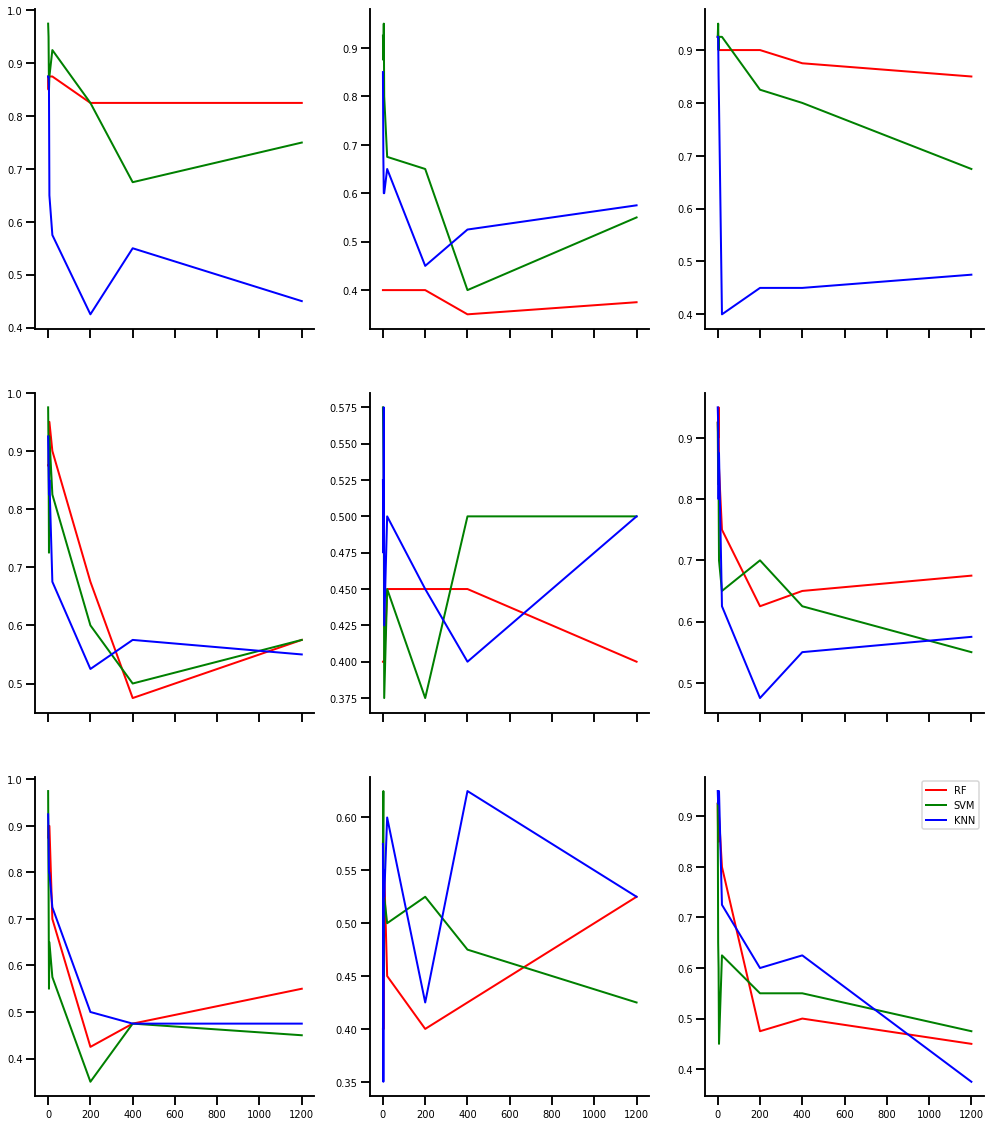

In [125]:
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
sns.set_context("talk", font_scale=0.6)

noise_dim = [0,2, 4, 6, 20, 200, 400, 1200]
k1 = 8
k2 = 16
k3 = 24
k4 = 32

data = {'RF': [accuracy1_RF1, accuracy2_RF1, accuracy3_RF1,
               accuracy1_RF2,accuracy2_RF2, accuracy3_RF2,
               accuracy1_RF3,accuracy2_RF3, accuracy3_RF3],
        
        'SVM':[accuracy1_SVM1, accuracy2_SVM1, accuracy3_SVM1, 
               accuracy1_SVM2, accuracy2_SVM2, accuracy3_SVM2, 
               accuracy1_SVM3, accuracy2_SVM3, accuracy3_SVM3], 
        
       'KNN': [accuracy1_KNN1, accuracy2_KNN1, accuracy3_KNN1,
               accuracy1_KNN2, accuracy2_KNN2, accuracy3_KNN2,
               accuracy1_KNN3, accuracy2_KNN3, accuracy3_KNN3]}

df = pd.DataFrame(data) 
df.head(1)

fig, axes = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(17,20))
axes_list = [item for sublist in axes for item in sublist] 

for gr in range(9):
    
    ax = axes_list.pop(0)
    
    ax.plot(noise_dim, df.ix[gr, 'RF'], marker='', markerfacecolor='red', markersize=12, color='red', linewidth=2, label="RF")
    ax.plot(noise_dim, df.ix[gr, 'SVM'], marker='', color='green', linewidth=2,label="SVM")
    ax.plot(noise_dim, df.ix[gr, 'KNN'],  marker='', color='blue', linewidth=2, label="KNN")
    #ax.set_xscale('log')
    #ax.set_ylabel("Accuracy")
    #ax.set_xlabel("Noise Dimensions")
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
ax.legend()    


for ax in axes_list:
     ax.remove()
plt.show()    

    

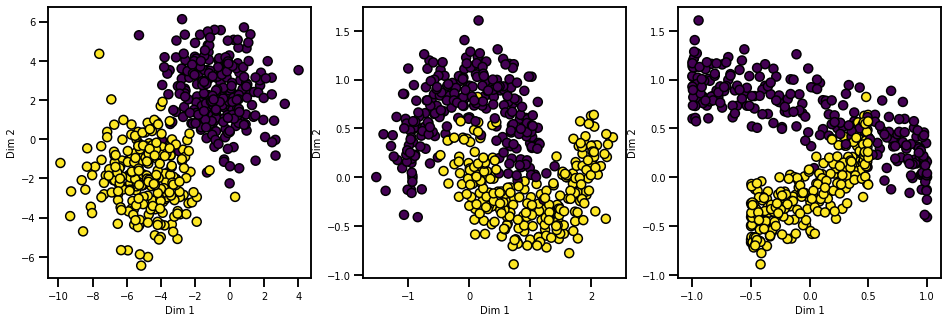

In [39]:
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
sns.set_context("talk", font_scale=0.6)

plt.figure(figsize = (16,5))
plt.subplot(1,3,1)
plt.scatter(X1[:, 0], X1[:, 1], c=y1,edgecolors='k')
plt.xlabel('Dim 1',fontsize=10)
plt.ylabel('Dim 2',fontsize=10)
plt.subplot(1,3,2)
plt.scatter(X2[:, 0], X2[:, 1], c=y2,edgecolors='k')
plt.xlabel('Dim 1',fontsize=10)
plt.ylabel('Dim 2',fontsize=10)
plt.subplot(1,3,3)
plt.scatter(X3[:, 0], X2[:, 1], c=y3,edgecolors='k')
plt.xlabel('Dim 1',fontsize=10)
plt.ylabel('Dim 2',fontsize=10)
plt.show()

In [ ]:
plt.plot( 'dimensions', 'RF', data=df, marker='', markerfacecolor='red', markersize=12, color='red', linewidth=2)
plt.plot( 'dimensions', 'SVM', data=df, marker='', color='green', linewidth=2)
plt.plot( 'dimensions', 'KNN', data=df, marker='', color='blue', linewidth=2, label="KNN")
plt.xlabel('Noise dimensions')
plt.ylabel('Accuracies')
